In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
iris_data = np.array([
    [5.1, 3.5, 1.4, 0.2, 0],  #Setosa
    [4.9, 3.0, 1.4, 0.2, 0],
    [4.7, 3.2, 1.3, 0.2, 0],
    [4.6, 3.1, 1.5, 0.2, 0],
    [5.0, 3.6, 1.4, 0.2, 0],
    [7.0, 3.2, 4.7, 1.4, 1],  #Versicolor
    [6.4, 3.2, 4.5, 1.5, 1],
    [6.9, 3.1, 4.9, 1.5, 1],
    [5.5, 2.3, 4.0, 1.3, 1],
    [6.5, 2.8, 4.6, 1.5, 1],
    [6.3, 3.3, 6.0, 2.5, 2],  #Virginica
    [5.8, 2.7, 5.1, 1.9, 2],
    [7.1, 3.0, 5.9, 2.1, 2],
    [6.3, 2.9, 5.6, 1.8, 2],
    [6.5, 3.0, 5.8, 2.2, 2],
])

#Split features and labels
X = iris_data[:, :4]  # Features
y = iris_data[:, 4]  # Labels

#Normalize features (Min-Max Scaling)
X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X = (X - X_min) / (X_max - X_min)

In [3]:
class NeuralNetwork(object):
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate):
        self.learning_rate = learning_rate
        self.W_HI = np.random.randn(input_neurons, hidden_neurons)
        self.W_OH = np.random.randn(hidden_neurons, output_neurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(hidden_input)

        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)

        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)

    def train(self, X, Y, epochs):
        loss_history = []
        # Convert labels to one-hot encoding
        Y_one_hot = np.zeros((len(Y), 3))
        Y_one_hot[np.arange(len(Y)), Y.astype(int)] = 1

        for epoch in range(epochs):
            output = self.feedForward(X)
            self.backPropagation(X, Y_one_hot, output)
            loss = np.mean(np.square(Y_one_hot - output))
            loss_history.append(loss)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        return loss_history


Epoch 0, Loss: 0.2917
Epoch 100, Loss: 0.2768
Epoch 200, Loss: 0.2571
Epoch 300, Loss: 0.2368
Epoch 400, Loss: 0.2274
Epoch 500, Loss: 0.2175
Epoch 600, Loss: 0.1993
Epoch 700, Loss: 0.1735
Epoch 800, Loss: 0.1647
Epoch 900, Loss: 0.1573


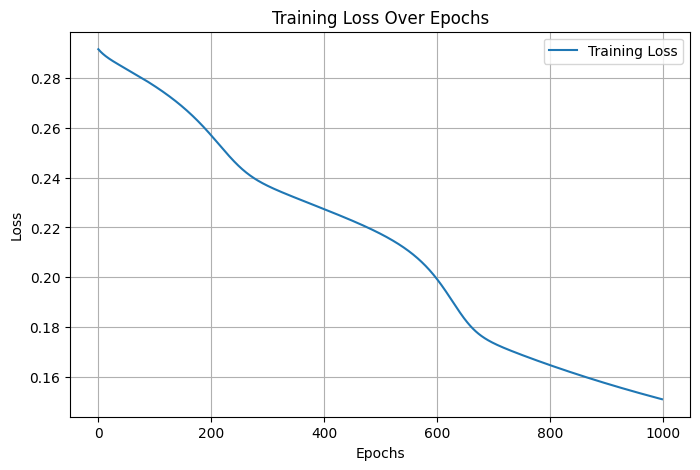

In [4]:
nn = NeuralNetwork(input_neurons=4, hidden_neurons=10, output_neurons=3, learning_rate=0.01)

#Train the model
loss_history = nn.train(X, y, epochs=1000)

#Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Training Loss")
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()